Disaster Data Analysis (EMDAT)

課題の目的

この Notebook では、EMDAT の災害データ（emdat.csv）を読み込み、
自作の関数・サンプル出力・for 文ループを使って、複数の結果を自動生成する。
最終的に、災害の発生傾向について簡単に考察をまとめる。

使用データ

emdat.csv : 国際災害データ EM-DAT の一部

主に以下の列を使用

Year（発生年）

Disaster Type（災害の種類）

Total Deaths（死者数）

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# emdat.csv が Week10 フォルダ内にある前提
df = pd.read_csv("emdat.csv")

df.head()


,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [3]:
def yearly_deaths(disaster_type):
    """指定した災害タイプの年別死者数を返す関数"""
    sub = df[df["Disaster Type"] == disaster_type]
    grouped = sub.groupby("Year")["Total Deaths"].sum()
    return grouped


In [4]:
df.columns


Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year',
       'Total Deaths'],
      dtype='object')

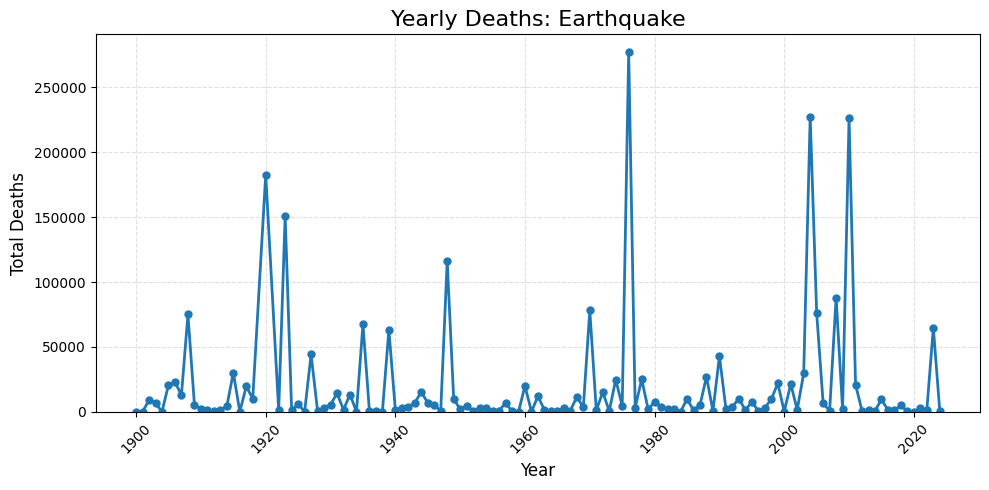

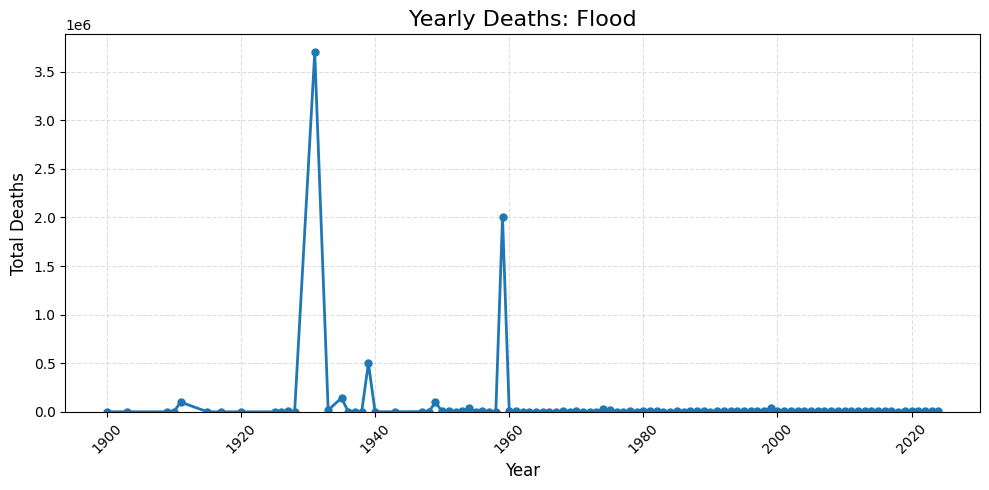

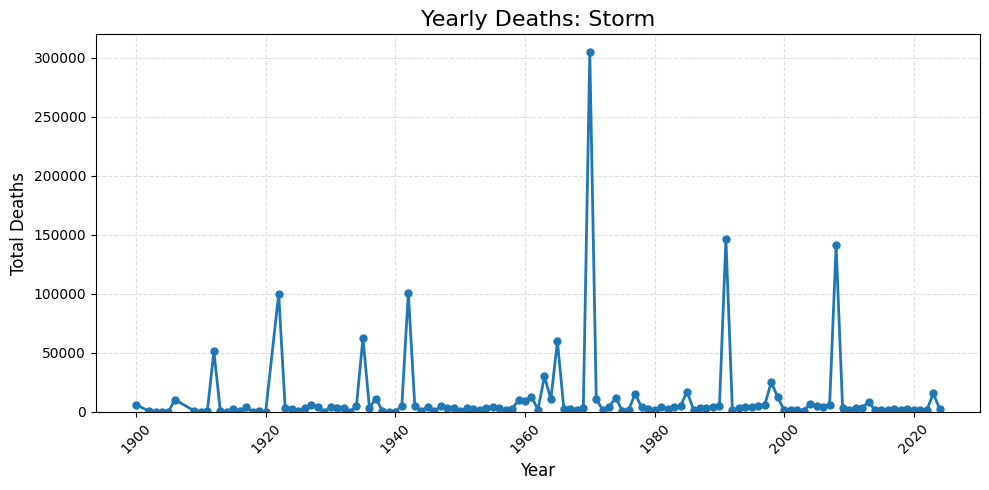

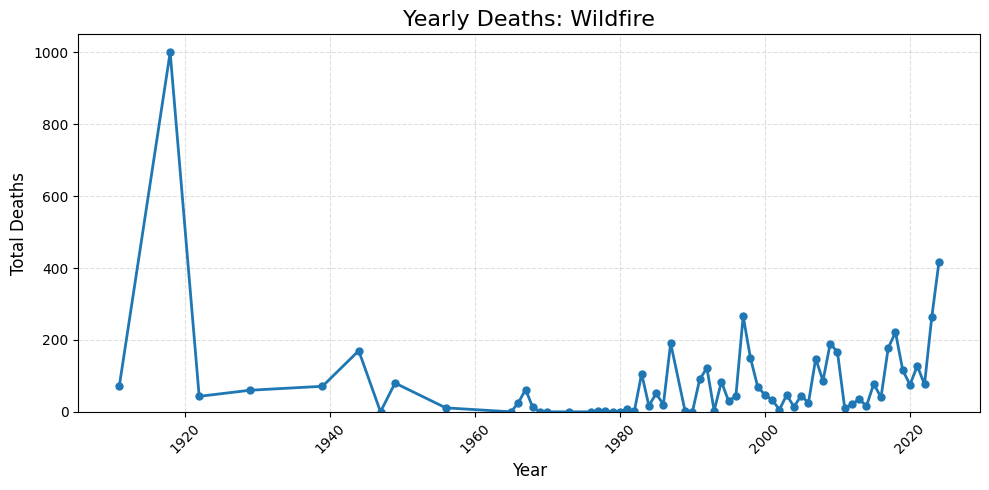

In [6]:
disasters = ["Earthquake", "Flood", "Storm", "Wildfire"]

for d in disasters:
    data_d = yearly_deaths(d)

    plt.figure(figsize=(10,5))
    
    # 見やすく改良した線グラフ
    plt.plot(
        data_d.index, 
        data_d.values, 
        linewidth=2, 
        marker='o', 
        markersize=5
    )
    
    # タイトル・目盛りなどの調整
    plt.title(f"Yearly Deaths: {d}", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Total Deaths", fontsize=12)
    
    # 軸目盛りを見やすく
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    # グリッドの追加
    plt.grid(alpha=0.4, linestyle='--')
    
    # Y 軸の下限を 0 にする
    plt.ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()


結果と考察

本 Notebook では、自作関数を使って災害タイプ別の年間死者数を算出し、
さらに for 文ループで複数のグラフ（Earthquake / Flood / Storm / Wildfire）を自動生成した。

グラフからわかることとして、

・災害タイプによって年ごとの変動幅が大きく異なる

・Flood（洪水）や Storm（嵐）は発生回数が多く、死者数が急増する年が存在する

・Earthquake（地震）は大規模災害が発生した年に突出したピークが見られる

これらは災害ごとの性質の違いや世界地域での頻発状況を反映しており、
EMDAT データを用いることで災害傾向を客観的に分析できることが確認できた。